In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
with open("e2e_saliency_robust_detail.pkl", "rb") as f:
    e2e_saliency = pickle.load(f)
with open("tl_saliency_robust_detail.pkl", "rb") as f:
    tl_saliency = pickle.load(f)
with open("test_set_17_227.pkl", "rb") as f:
    faces = pickle.load(f)

In [4]:
selected = {"Nicolas Cage": [1,3], "Anne Hathaway": [4,5], "America Ferrera": [13,14]}

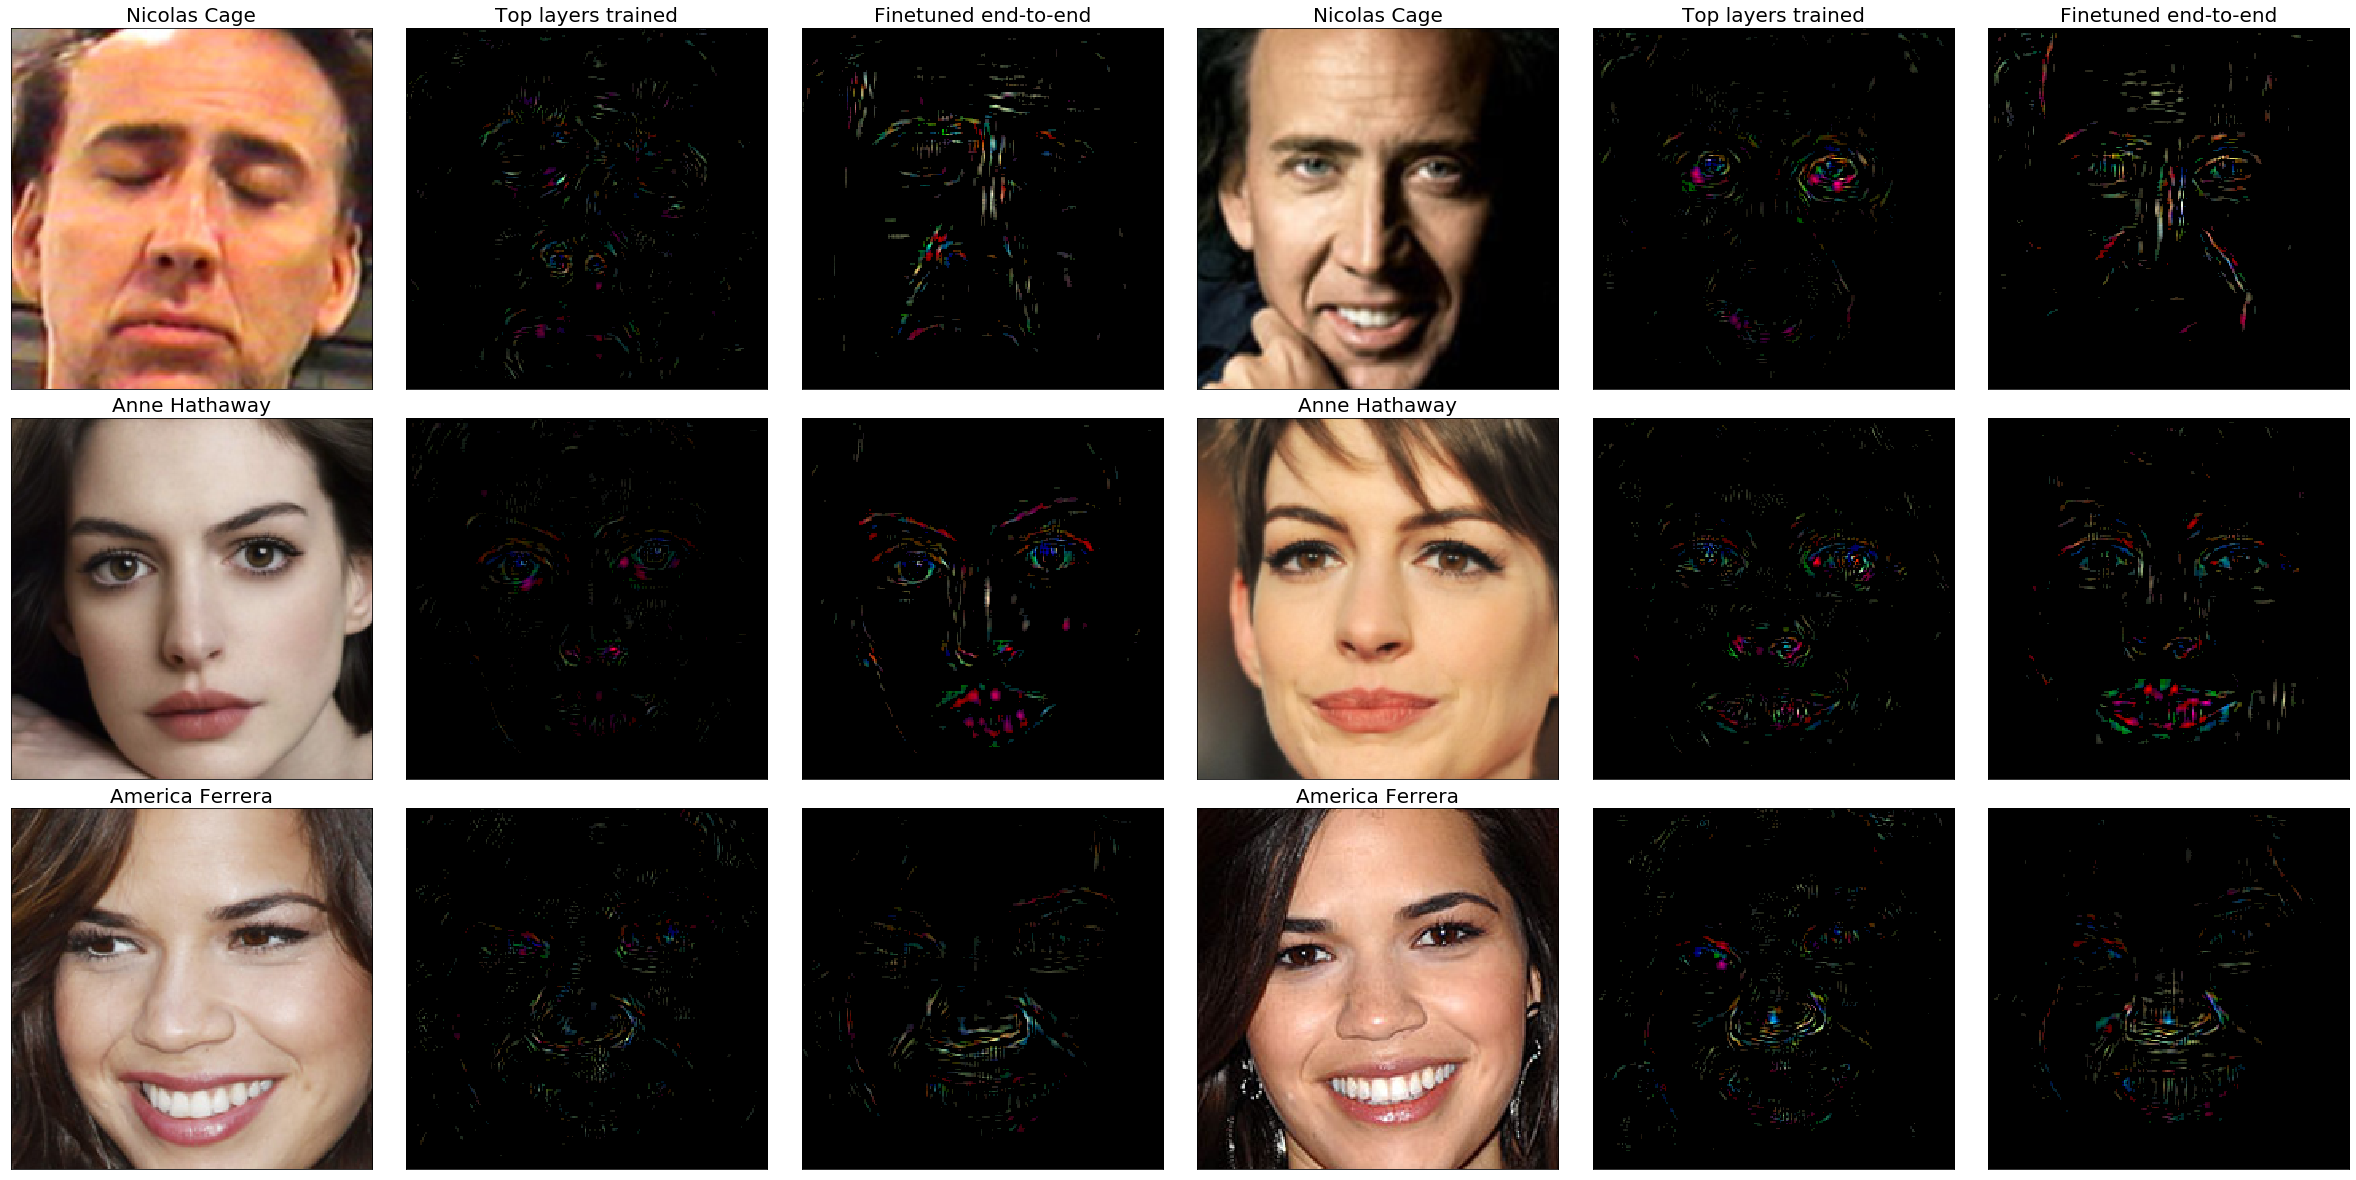

In [10]:
fig, axs = plt.subplots(3, 6, figsize=(42, 21))
plt.subplots_adjust(wspace=0.08, hspace=0.08)
for i, star in enumerate(selected):
    for k in range(2):
        ax=axs[i, k*3 + 0]
        ax.imshow(faces[star][selected[star][k]]/255.0)
        ax.set_title(f"{star}", fontsize=20)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax=axs[i, k*3 + 1]
        ax.imshow(tl_saliency[star][selected[star][k]])
        if i == 0:
            ax.set_title(f"Top layers trained", fontsize=20)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        
        ax=axs[i, k*3 + 2]
        ax.imshow(e2e_saliency[star][selected[star][k]])
        if i == 0:
            ax.set_title(f"Finetuned end-to-end", fontsize=20)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


In [11]:
fig.savefig("tl_vs_e2e.pdf", pad_inches=0.0, bbox_inches = 'tight')